In [84]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
# Read in the dataset
ufo = pd.read_csv(Path.joinpath(Path.cwd().parent, 'data', 'ufo.csv'))
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [86]:
# Check out the time variable
ufo['Time'].describe()

count              80543
unique             68901
top       7/4/2014 22:00
freq                  45
Name: Time, dtype: object

In [87]:
# What type of var is it?
ufo['Time'].dtype

dtype('O')

In [88]:
# convert a string to the datetime format
ufo['Time'] = pd.to_datetime(ufo['Time'])
ufo['Time'].dtype # Now it's dt format

dtype('<M8[ns]')

In [89]:
ufo['Date'] = ufo['Time'].dt.date
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Date
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18


In [90]:
# Create some additional variables
ufo['Year']=ufo['Time'].dt.year 
ufo['Month']=ufo['Time'].dt.month 
ufo['Day']=ufo['Time'].dt.day 
ufo['Hour']=ufo['Time'].dt.hour 
ufo['Weekday']=ufo['Time'].dt.weekday 
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Date,Year,Month,Day,Hour,Weekday
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1


In [91]:
# also allows you to do datetime "math"
(ufo.Time.max() - ufo.Time.min()).days  

30776

In [92]:
# Create a weekday variable
ufo['weekday_name']=ufo['Weekday'].map({0:'0_Sunday',
                                       1: '1_Monday',
                                       2: '2_Tuesday',
                                       3: '3_Wednesday',
                                       4: '4_Thursday',
                                       5: '5_Friday',
                                       6: '6_Saturday'})
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Date,Year,Month,Day,Hour,Weekday,weekday_name
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6,6_Saturday
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0,0_Sunday
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6,6_Saturday
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0,0_Sunday
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1,1_Monday


In [93]:
# Set the Time variable as the dataframe index (This will make plotting timelines easier)
# ufo=ufo.set_index('Time')

In [94]:
# which dates were the most frequent ufo sightings?
ufo['Date'].value_counts(ascending=False).head(5)

2014-07-04    258
2010-07-04    202
2012-07-04    188
1999-11-16    187
2013-07-04    177
Name: Date, dtype: int64

In [95]:
# Create a variable to count the number of sightings by date
ufo['sightings']=1
dates = ufo.groupby('Date')['sightings'].sum()
ufo = ufo.drop('sightings', axis=1)
dates.sort_values(ascending=False).head()

Date
2014-07-04    258
2010-07-04    202
2012-07-04    188
1999-11-16    187
2013-07-04    177
Name: sightings, dtype: int64

In [96]:
# Create a new dataframe of sightings
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.sort_values('sightings', ascending=False).head()

,Date,sightings
10496,2014-07-04,258
9035,2010-07-04,202
9766,2012-07-04,188
5168,1999-11-16,187
10131,2013-07-04,177


In [97]:
# Merge the daily number of sightings back into the original datafram
ufo2 = pd.merge(ufo, dates_df, on='Date', how='left')
ufo2.head()

,City,Colors Reported,Shape Reported,State,Time,Date,Year,Month,Day,Hour,Weekday,weekday_name,sightings
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6,6_Saturday,1
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0,0_Sunday,1
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6,6_Saturday,1
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0,0_Sunday,1
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1,1_Monday,1


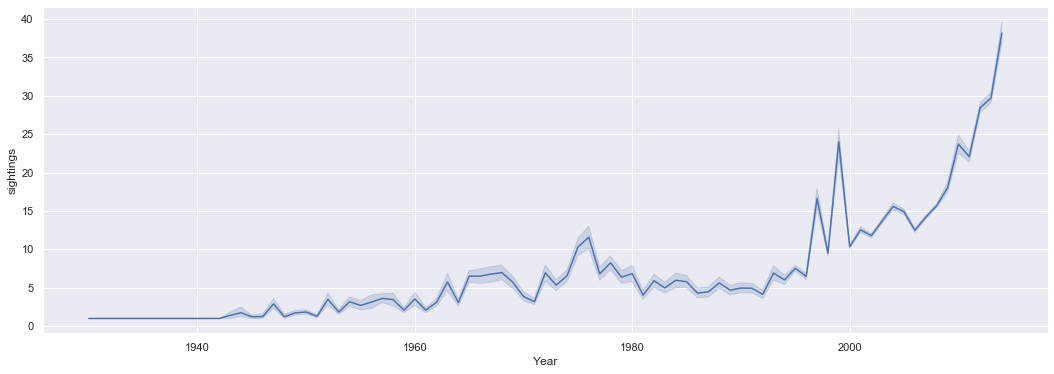

In [98]:
# Trend over years
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x='Year', y='sightings', data=ufo2);

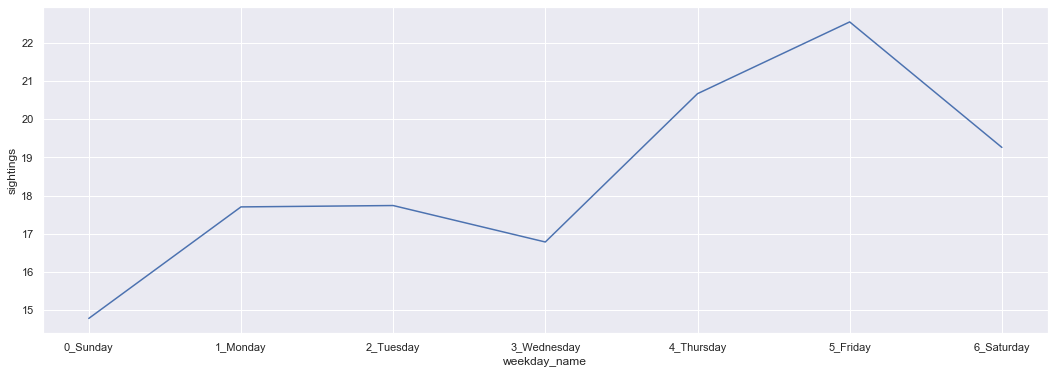

In [99]:
# Trend over weekday

sns.lineplot(x='weekday_name', y='sightings', data=ufo2, ci=None);

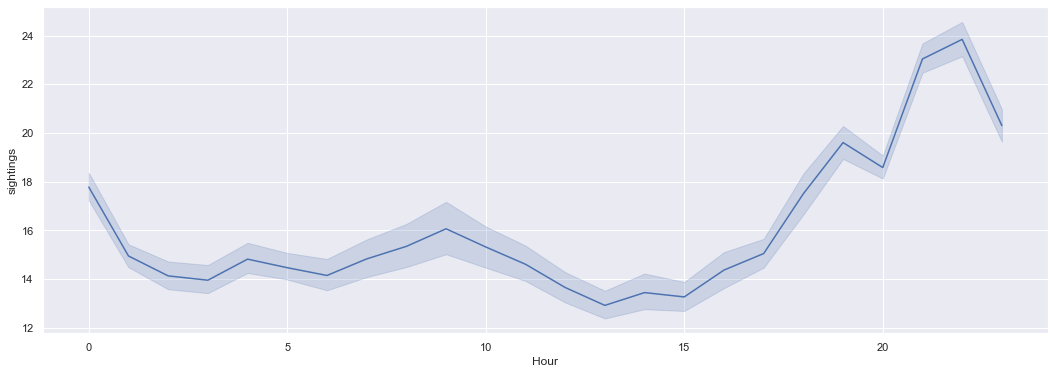

In [100]:
# Trend over time of day

sns.lineplot(x='Hour', y='sightings', data=ufo2);

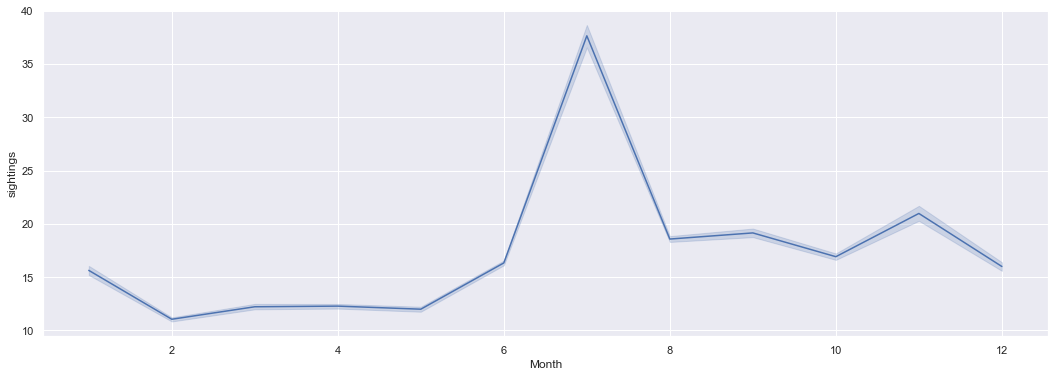

In [101]:
# Trend over month

sns.lineplot(x='Month', y='sightings', data=ufo2);

In [102]:
# Shorten the color categories
print(ufo['Colors Reported'].value_counts().head(5))
ufo['color']='other'
ufo.loc[ufo['Colors Reported']=='ORANGE', 'color']='orange'
ufo.loc[ufo['Colors Reported']=='RED', 'color']='red'
ufo.loc[ufo['Colors Reported']=='GREEN', 'color']='green'
ufo.head()

ORANGE    5216
RED       4809
GREEN     1897
BLUE      1855
YELLOW     842
Name: Colors Reported, dtype: int64


,City,Colors Reported,Shape Reported,State,Time,Date,Year,Month,Day,Hour,Weekday,weekday_name,color
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6,6_Saturday,other
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0,0_Sunday,other
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6,6_Saturday,other
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0,0_Sunday,other
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1,1_Monday,other


In [103]:
# Alternative: create new columns for specific colors
import numpy as np
print(ufo['Colors Reported'].value_counts().head(5))
ufo['orange']=np.where(ufo['Colors Reported']=='ORANGE', 1, 0)
ufo['red']=np.where(ufo['Colors Reported']=='RED', 1, 0)
ufo['green']=np.where(ufo['Colors Reported']=='GREEN', 1, 0)
ufo['other_color']=np.where(ufo['orange']+ufo['red']+ufo['green']==0, 1, 0)
ufo.head()

ORANGE    5216
RED       4809
GREEN     1897
BLUE      1855
YELLOW     842
Name: Colors Reported, dtype: int64


,City,Colors Reported,Shape Reported,State,Time,Date,Year,Month,Day,Hour,Weekday,weekday_name,color,orange,red,green,other_color
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930-06-01,1930,6,1,22,6,6_Saturday,other,0,0,0,1
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930-06-30,1930,6,30,20,0,0_Sunday,other,0,0,0,1
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931-02-15,1931,2,15,14,6,6_Saturday,other,0,0,0,1
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931-06-01,1931,6,1,13,0,0_Sunday,other,0,0,0,1
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933-04-18,1933,4,18,19,1,1_Monday,other,0,0,0,1


In [126]:
# Collapse the dataframe on color and date
ufo['sighting']=1
dates = ufo.groupby(['Year', 'color'])['sighting'].sum()
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.head()
dates_df[dates_df['Year']==2009]

,Year,color,sighting
245,2009,green,82
246,2009,orange,220
247,2009,other,3689
248,2009,red,260


In [123]:
# Restrict the dataset (makes the chart easier to read)
dates_df2=dates_df.loc[(dates_df['Year']>2000) & (dates_df['Year']<2015) & (dates_df['color']!='other')]

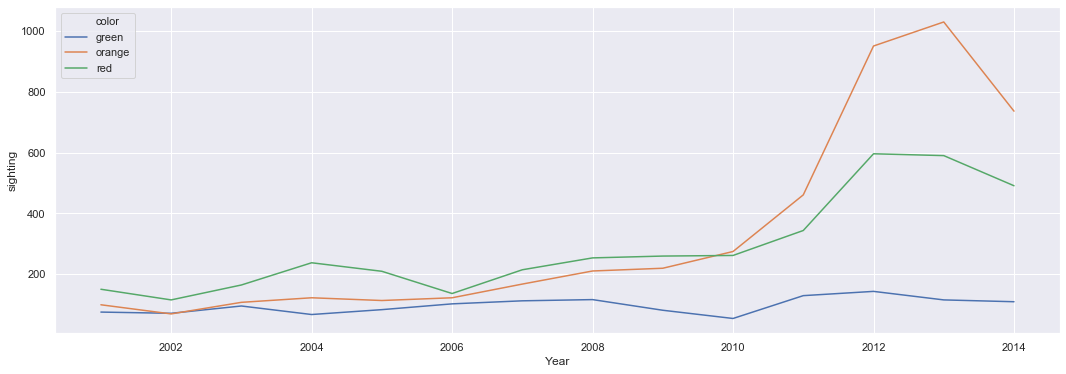

In [124]:
# Plot the lines
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x="Year", y="sighting", hue="color", data=dates_df2);

## Summary

In [ ]:
ufo = pd.read_csv(Path.joinpath(Path.cwd().parent, 'data', 'ufo.csv'))
# convert a string to the datetime format
ufo['Time'] = pd.to_datetime(ufo['Time'])
ufo['Time'].dtype 
# create new time variables
ufo['Date'] = ufo['Time'].dt.date
ufo['Year']=ufo['Time'].dt.year 
ufo['Month']=ufo['Time'].dt.month 
ufo['Day']=ufo['Time'].dt.day 
ufo['Hour']=ufo['Time'].dt.hour 
ufo['Weekday']=ufo['Time'].dt.weekday 
# also allows you to do datetime "math"
(ufo.Time.max() - ufo.Time.min()).days  
# which dates were the most frequent ufo sightings?
ufo['Date'].value_counts(ascending=False).head(5)
# Create a variable to count the number of sightings by date
ufo['sightings']=1
dates = ufo.groupby('Date')['sightings'].sum()
ufo = ufo.drop('sightings', axis=1)
# Merge the original and grouped datasets
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
ufo2 = pd.merge(ufo, dates_df, on='Date', how='left')
# Line charts
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x='Year', y='sightings', data=ufo2);
sns.lineplot(x='weekday_name', y='sightings', data=ufo2, ci=None);
sns.lineplot(x='Hour', y='sightings', data=ufo2);
sns.lineplot(x='Month', y='sightings', data=ufo2);
# Shorten the color categories
print(ufo['Colors Reported'].value_counts().head(5))
ufo['color']='other'
ufo.loc[ufo['Colors Reported']=='ORANGE', 'color']='orange'
ufo.loc[ufo['Colors Reported']=='RED', 'color']='red'
ufo.loc[ufo['Colors Reported']=='GREEN', 'color']='green'
# Collapse the dataframe on color and date
ufo['sighting']=1
dates = ufo.groupby(['Year', 'color'])['sighting'].sum()
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.head()
dates_df[dates_df['Year']==2009]
# Plot the lines
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x="Year", y="sighting", hue="color", data=dates_df2);